# Simple Linear Regression Tutorial

Start with some imports and generic plot styling settings.

In [64]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib.colors
from cycler import cycler
plt.style.use("ggplot")
palette = ["#00B0F6", "#F8766D", "#00BF7D", "#A3A500", "#E76BF3"]
plt.rc('axes', prop_cycle=(cycler('color', palette)))

We are given some data relating grain size, sintering time, and steel_grade to yield strength. We can open this using the pandas library. 

To open an excel file you may need to install a library called `openpyxl`, to do this, simply issue the following commands:

`conda activate MatInformatics`

`conda install openpyxl -y`

After you've loaded the data, try using the data wrangler extension to view the data in a little more detail and perhaps make a few changes.

In [65]:
# load the excel data into a pandas dataframe
df = pd.read_excel('hall-petch_data.xlsx')
# I am renamong some of the columns to make it easier, you do not have to do this.
df.columns = ['steel_grade', 'grain_size', 'sintering_time', 'yield_strength']
display(df)

,steel_grade,grain_size,sintering_time,yield_strength
0,A36,19350.475451,2.282247e+06,48.212639
1,A36,864.265391,4.685071e+04,183.834770
2,A36,347.471660,1.499200e+04,240.990817
3,A36,347.471660,1.499200e+04,240.990817
4,A36,176.924801,6.442617e+03,253.985362
...,...,...,...,...
73,AISI 316,10.932982,1.888032e+02,1129.101430
74,AISI 316,9.572428,1.583750e+02,1073.171566
75,AISI 316,8.732173,1.401077e+02,1151.466313
76,AISI 316,7.435016,1.127729e+02,1176.092555


It's generally good practice to visualize your data in order to start understanding relationships between different variables and the response that you are trying to predict. There are many approaches to visualization, but to start we will simply plot each variable against yield strength.

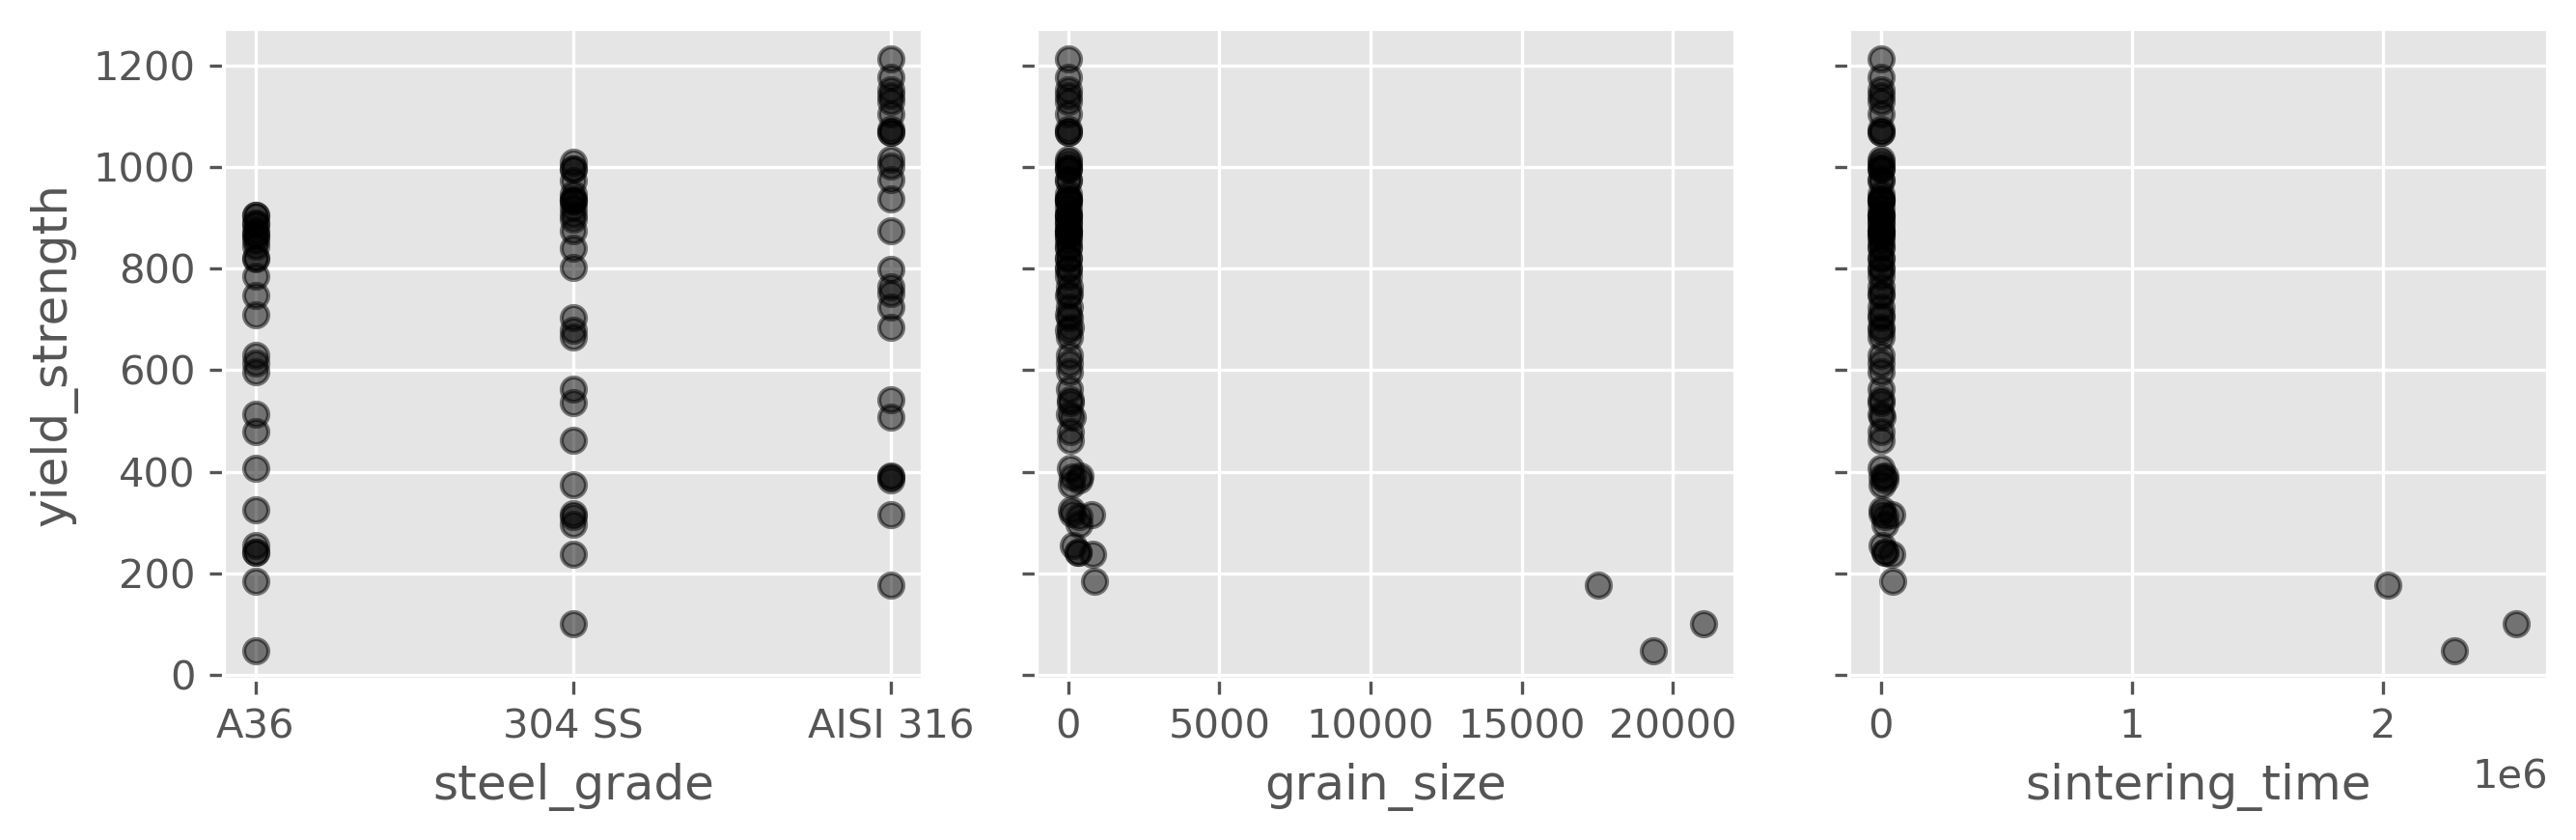

In [66]:
# plot a few of the relationships to better understand relationships and expected transforms
fig, ax = plt.subplots(ncols=3, figsize=(9, 3), dpi=300, sharey=True, layout='tight')

for i, column in enumerate(df.columns[:-1]):
    ax[i].plot(df[column], df['yield_strength'], ls='None', marker='o', color='k', alpha=0.5)
    ax[i].set_xlabel(column)
ax[0].set_ylabel(df.columns[-1])
plt.show()

The above plots start to give us some intuition about the data and more importantly show that two of our variables contain some extreme data points. To better visualize these, we can apply a simple log transform to the `grain_size` and `sintering_time` variables. The results of this transformation are shown in the figures below. You will notice that the the values appear to vary non-linearly and that `grain_size` and `sintering_time` appear to be identical in behavior, but not scale.

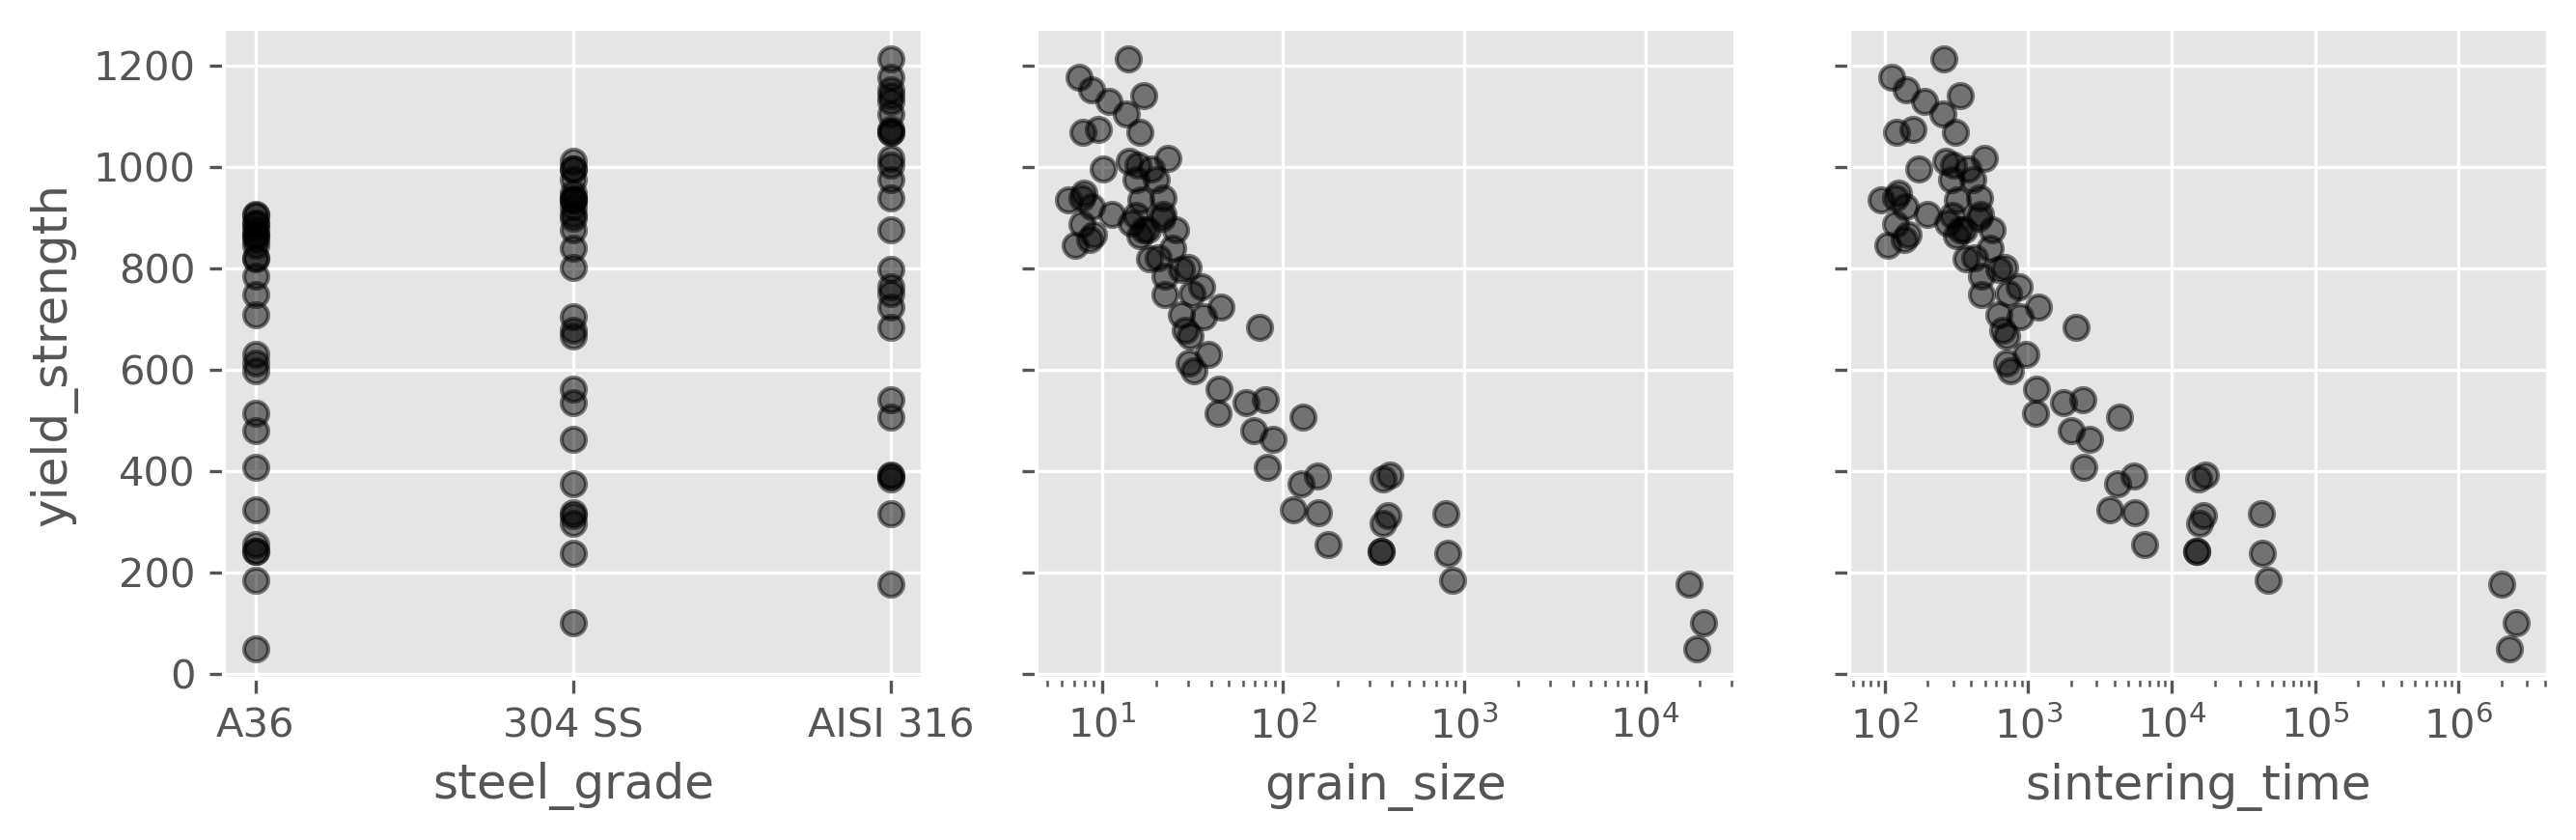

In [67]:
# plot a few of the relationships to better understand relationships and expected transforms
fig, ax = plt.subplots(ncols=3, figsize=(9, 3), dpi=300, sharey=True, layout='tight')

for i, column in enumerate(df.columns[:-1]):
    ax[i].plot(df[column], df['yield_strength'], ls='None', marker='o', color='k', alpha=0.5)
    ax[i].set_xlabel(column)
ax[0].set_ylabel(df.columns[-1])
ax[1].set_xscale("log")
ax[2].set_xscale("log")

plt.show()

Imagine you want to predict the yield strength as a function of `grain_size` a first approach might be to set up a simple linear model of the form: 
\begin{equation}
yield \ strength = \beta_0 + \beta_1 * grain \  size
\end{equation}

We can fit this model using the `statsmodels` library and an ordinary least squares (OLS) model. 

In [68]:
# fit the model
results = smf.ols('yield_strength ~ grain_size', data=df).fit()

# look at the results
print("Model Parameters")
print(results.params)

print("\nR^2", results.rsquared)

Model Parameters
Intercept     745.660164
grain_size     -0.035105
dtype: float64

R^2 0.19581945890689267


In [69]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         yield_strength   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     18.51
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.98e-05
Time:                        15:51:01   Log-Likelihood:                -545.53
No. Observations:                  78   AIC:                             1095.
Df Residuals:                      76   BIC:                             1100.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    745.6602     31.007     24.048      0.0

`statsmodels` provides lots of useful information about our model fit that can help us determine significant variables or diagnose fitting issues. The bullet points below provide a summary of the interpretations of the some of the values reported in the results. However, please note that these metrics are complex and easily misinterpretted. We encourage you to spend some time familiarizing yourselves with some of these metrics in the future.


- `R-squared` : summarizes how well the model explains the variation in the dependent variable, with higher values indicating a better fit and a greater proportion of variance explained by the independent variables.

- `F-statistic` : assesses whether the regression model, with its independent variables, provides a statistically significant improvement in explaining the variation in the dependent variable compared to a model with no independent variables, with a higher F-statistic indicating a better fit.

- `coef` : the estimated value of the intercept or coefficient on an independent variable.

- `std err` : the standard error on the intercept or coefficient, you can understand this as the average amount that this estimated intercept or coefficient differs from the true, unknown value.

- `t-statistic (t)` : assesses whether the intercept or coefficient is significantly different from zero. A higher absolute t-statistic indicates a more significant effect.

- `P>|t|` : tells you the probability of observing the intercept or coefficient by random chance if the true intercept or coefficient value was zero. A low p-value (<0.05) is a good sign; however, be very careful when relying on p-values as they are rather controversial.

- `[0.025 - 0.975]` : a 95% confidence interval for the intercept or coefficient value. Think of this as a range within which the true value is likely to fall.

~ ~ ~

The model doesn't look like a good fit, but single valued numbers can be misleading. when data dimmenions are sufficiently low, we can visualize the fit directly and determine the goodness of fit. The figure below shows a fit to the data as we specified it. We see that the non-linear relationship isn't encoded and we don't capture a lot of the variation in the data.

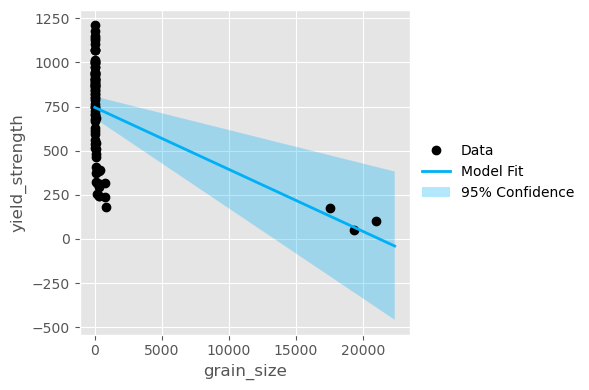

In [76]:
xdata = np.logspace(0.81, 4.35, 1000) # simple data to plot smooth fit line
fig, ax = plt.subplots(figsize=(6, 4), dpi=100, sharey=True, layout='tight')
ax.plot(df.grain_size, df.yield_strength, ls="None", marker='o', color='k', label='Data')
ax.plot(xdata, -0.0351*xdata+745.6602, lw=2, label='Model Fit')
ax.fill_between(xdata, -0.051*xdata+683.904, -0.019*xdata+807.416, alpha=0.3, label='95% Confidence')
ax.set_xlabel('grain_size')
ax.set_ylabel('yield_strength')
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

It's clear that our data does not vary linearly, so perhaps we can apply a transformation to our data so as to account for that non-linearity? As engineers we know how different functions behave under different transforms. The data appears similar to a 1/x function. As materials scientists we are familar with the Hall-Petch relationship and know that it varies according to 1/sqrt(x), let's encode that transform and update the model.

In [71]:
def petch_transform(x):
    return 1/np.sqrt(x)

results = smf.ols('yield_strength ~ petch_transform(grain_size)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         yield_strength   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     304.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.62e-28
Time:                        15:51:01   Log-Likelihood:                -491.19
No. Observations:                  78   AIC:                             986.4
Df Residuals:                      76   BIC:                             991.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

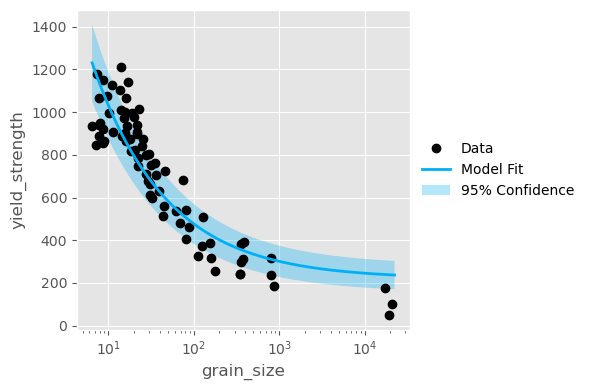

In [72]:
xdata = np.logspace(0.81, 4.35, 1000) # simple data to plot smooth fit line
fig, ax = plt.subplots(figsize=(6, 4), dpi=100, sharey=True, layout='tight')
ax.plot(df.grain_size, df.yield_strength, ls="None", marker='o', color='k', label='Data')
ax.plot(xdata, petch_transform(xdata)*2567.9708 + 219.9421, lw=2, label='Model Fit')
ax.fill_between(xdata, 
                petch_transform(xdata)*2274.944 + 155.823,
                petch_transform(xdata)*2860.998 + 284.061,
                lw=2,
                alpha=0.3,
                label='95% Confidence')
plt.xscale("log")
ax.set_xlabel('grain_size')
ax.set_ylabel('yield_strength')
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Can we do better?

In our dataset we also have `sintering_time` and `steel_grade`. Looking at the earlier figure, it appears that sintering time data follows the exact same behavior as grain size, so we probably aren't going to learn anything new. Instead, let's look at steel grade, the figure below visualizes the data but makes distinctions between steel grades, we see that each of them appears offset from the others.

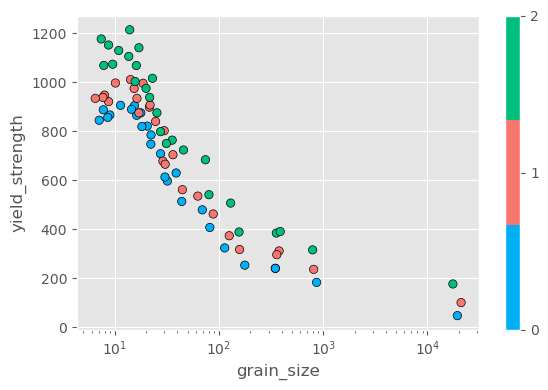

In [73]:
# convert the steel grade strings to a numerical format for plotting
df['category'] = df['steel_grade'].replace(['A36', '304 SS', 'AISI 316'],[0, 1, 2])

fig, ax = plt.subplots(figsize=(6, 4), dpi=100, sharey=True, layout='tight')
cmap = plt.get_cmap('terrain', np.max(df.category) - np.min(df.category) + 1)
cmap = matplotlib.colors.ListedColormap(["#00B0F6", "#F8766D", "#00BF7D"])
sc = ax.scatter(df.grain_size, df.yield_strength, c=df.category, edgecolor='k', label='Data', cmap=cmap)
cax = plt.colorbar(sc, ticks=np.arange(np.min(df.category), np.max(df.category) + 1))
ax.set_xscale('log')
ax.set_xlabel('grain_size')
ax.set_ylabel('yield_strength')
# plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Let's add `steel_grade` as a categorical variable to our model using the `C(var)` notation.

We see a nice increase in our $R^2$ value, but the interpretation of other metrics starts to become a little more confusing.

Now the results terms corresponding to different categories represent additive terms to the overall equation.

In [74]:
def petch_transform(x):
    return 1/np.sqrt(x)

results = smf.ols('yield_strength ~ petch_transform(grain_size) + C(steel_grade)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         yield_strength   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           7.34e-33
Time:                        15:51:01   Log-Likelihood:                -474.07
No. Observations:                  78   AIC:                             956.1
Df Residuals:                      74   BIC:                             965.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

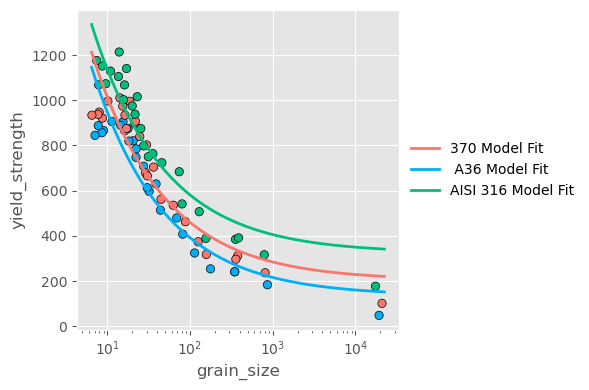

In [75]:
xdata = np.logspace(0.81, 4.35, 1000) # simple data to plot smooth fit line
fig, ax = plt.subplots(figsize=(6, 4), dpi=100, sharey=True, layout='tight')

ax.scatter(df.grain_size, df.yield_strength, c=df.category, cmap=cmap, edgecolor='k')

# 370 Steel
ax.plot(xdata, petch_transform(xdata)*2562.9633 + 203.4846, lw=2, label='370 Model Fit', color=palette[1])
# A36 Steel
ax.plot(xdata, petch_transform(xdata)*2567.9708 + 203.4846 - 68.6252, lw=2, label=' A36 Model Fit', color=palette[0])
# AISI 316 Steel
ax.plot(xdata, petch_transform(xdata)*2567.9708 + 203.4846 + 120.9020, lw=2, label='AISI 316 Model Fit', color=palette[2])

plt.xscale("log")
ax.set_xlabel('grain_size')
ax.set_ylabel('yield_strength')
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()